# Ordmoln

In [1]:
import pandas as pd

nyheter = pd.read_csv("https://kodanka.fi/_static/yle_nyheter.csv")
nyhetsrubriker = nyheter['Rubrik']
print(nyhetsrubriker.head())

0               Ted & Kaj: Din mamma var en sköldpadda
1                        Senaste nytt om coronaviruset
2    Tusentals Hongkongbor ute på gatorna i protest...
3    Hongkongborna uppmärksammade 23 år under kines...
4    Att vara kvinna och jägare är att våga ta plat...
Name: Rubrik, dtype: object


In [2]:
stoppord = pd.read_csv('https://kodanka.fi/_static/stoppord.txt', squeeze=True)
print(stoppord.head())

0    adertonde
1         adjö
2       aldrig
3         alla
4        allas
Name: aderton, dtype: object


In [3]:
from wordcloud import WordCloud

ordmoln = WordCloud(stopwords=set(stoppord), width=1000, height=1000, 
                    background_color="white")

In [4]:
ordmoln = ordmoln.generate((' ').join(nyhetsrubriker))

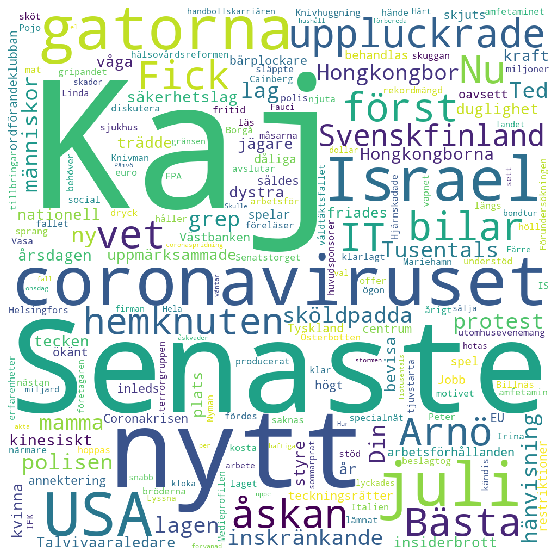

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(ordmoln)
plt.axis("off")
plt.show()

In [6]:
import requests
from io import BytesIO
from PIL import Image

png = requests.get('https://kodanka.fi/_static/anka.png')
anka = Image.open(BytesIO(png.content))

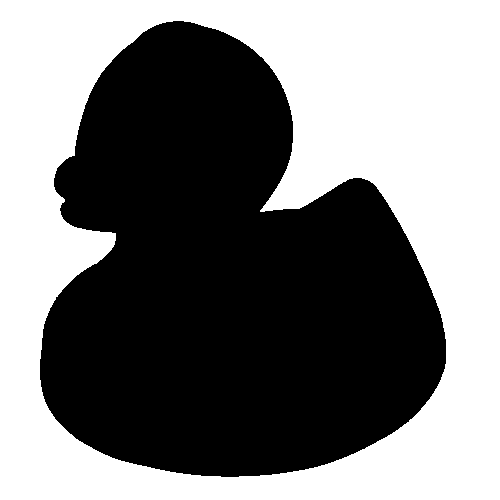

In [7]:
anka

In [8]:
import numpy as np

mask = np.array(anka)
print(mask[0])

[[255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 ...
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]]


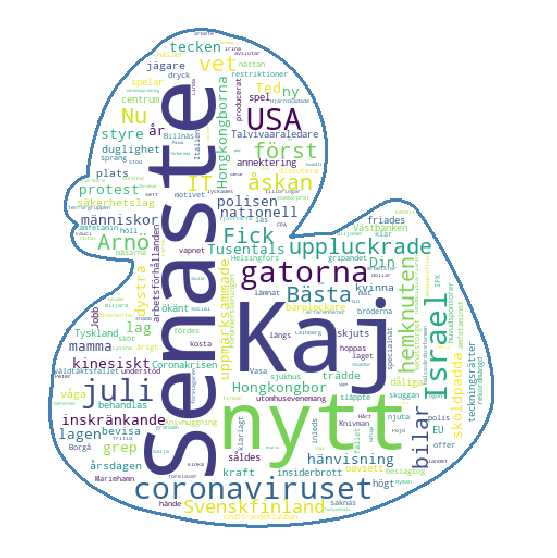

In [9]:
ordmoln = WordCloud(stopwords=set(stoppord), width=1000, height=1000, 
                    background_color="white", 
                    mask=mask, contour_width=3, contour_color='steelblue')
ordmoln = ordmoln.generate((' ').join(nyhetsrubriker))
plt.figure(figsize=(10, 10))
plt.imshow(ordmoln)
plt.axis("off")
plt.show()

```
import pandas as pd
import numpy as np
import requests
from io import BytesIO
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nyheter = pd.read_csv("https://kodanka.fi/_static/yle_nyheter.csv")
nyhetsrubriker = nyheter['Rubrik']

url = 'https://raw.githubusercontent.com/stopwords-iso/stopwords-sv/master/stopwords-sv.txt'
stoppord = pd.read_csv(url, squeeze=True)

respons = requests.get('https://kodanka.fi/_static/anka.png')
anka = Image.open(BytesIO(respons.content))
mask = np.array(anka)

ordmoln = WordCloud(stopwords=set(stoppord), width=1000, height=1000, 
                    background_color="white", 
                    mask=mask, contour_width=3, contour_color='steelblue')
ordmoln = ordmoln.generate((' ').join(nyhetsrubriker))
plt.figure(figsize=(10, 10))
plt.imshow(ordmoln)
plt.axis("off")
plt.show()
```

## Konsol

## Quiz